In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

<h2>Dataset

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)  # for reproducibility
age = np.random.randint(18, 61, size=500)

bought_insurance = [
    1 if a > 40 and np.random.rand() > 0.2 else 0
    for a in age
]

# create dataframe
df = pd.DataFrame({
    "age": age,
    "bought_insurance": bought_insurance
})

print(df.head())

# save to CSV
df.to_csv("insurance_data.csv", index=False)


   age  bought_insurance
0   56                 1
1   46                 1
2   32                 0
3   60                 1
4   25                 0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               500 non-null    int32
 1   bought_insurance  500 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 6.0 KB


In [4]:
df.head()

,age,bought_insurance
0,56,1
1,46,1
2,32,0
3,60,1
4,25,0


Text(0, 0.5, 'Bought Insurance')

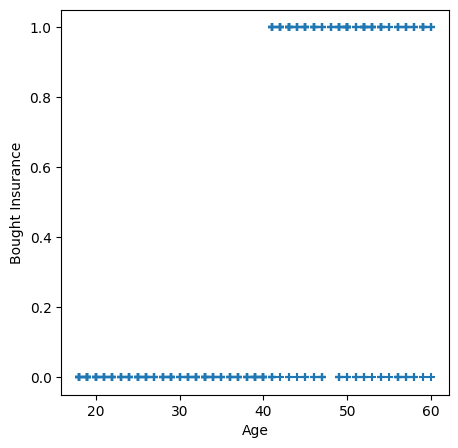

In [6]:
X=df['age']
Y=df['bought_insurance']
plt.figure(figsize=(5,5))
plt.scatter(X,Y ,marker='+')
plt.xlabel("Age")
plt.ylabel("Bought Insurance")